In [1]:
import glob
import os
import re
import random
import numpy as np
import pandas as pd
import math
from pathlib import Path
import matplotlib.pyplot as plt

import gensim
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [2]:
os.chdir("D://Datasets")

In [3]:
corpus = []

for path in Path('All enron unzip').rglob('*.txt'):
        with open(path, errors='ignore') as f_input:
            corpus.append(f_input.read())

In [4]:
df = pd.DataFrame(corpus)
df.head()

,0
0,Legitimate\n----------\n- Owner: farmer-d\n- T...
1,Subject: christmas tree farm pictures\n
2,"Subject: vastar resources , inc .\ngary , prod..."
3,Subject: calpine daily gas nomination\n- calpi...
4,Subject: re : issue\nfyi - see note below - al...


In [5]:
len(df)

27721

In [6]:
df = df.drop([0,5173,11031,16544,21720]) # Removed the summary bits
df.columns=["E-mails"]

In [7]:
z1 = np.arange(3673,5173)
z2 = np.arange(9534,11031)
z3 = np.arange(15043,16544)
z4 = np.arange(18043,21719)
z5 = np.arange(23220,27716)
ze = np.concatenate((z1,z2,z3,z4,z5))

z = np.zeros(27716)
df['spam'] = z
for i in ze:
    df.iloc[i,1] = 1 # 1 for spam, 0 for ham

In [8]:
random.seed(a=5)
df = df.sample(frac=1)	# Shuffle the entire dataframe
ten_off_df = math.floor(len(df)/10)

In [9]:
df.head(10)

,E-mails,spam
24154,Subject: please reply soon\nfrom : prince jose...,1.0
21019,Subject: confirmation request 218 - 791\nwe tr...,1.0
7994,Subject: happy holidays !\ni wish you wonderfu...,0.0
4991,"Subject: re : oem photoshop , photoshop , font...",1.0
6057,Subject: re : bruno repetto interview with enr...,0.0
24680,Subject: no hassles or embarrasment order from...,1.0
7310,"Subject: re : confidential\nmolly ,\nwe are in...",0.0
20638,Subject: are you ready to get it ?\nhello !\nv...,1.0
19866,"Subject: really workks very good\nhello , welc...",1.0
11403,Subject: immigration update\nlouise and marcus...,0.0


In [10]:
#################[Failed FOR loop attempt]
# df_temp = df
# for i in range(1,9):
 #    locals()['df_{}.index.values'.format(i)] = df_temp.sample(ten_off_df)
 #    c_df = locals()['df_{}'.format(i)]
 #    locals()['l_{}'.format(i)] = list(c_df.index.values)
 #    loc_l = locals()['l_{}'.format(i)]
 #    df_temp = df_temp.drop(loc_l)

In [11]:
################# [Good For loop attempt]
df_temp = df
for i in range(0,9):
    a = df_temp.sample(ten_off_df)
    locals()['df_{}'.format(i)] = a
    l = list(a.index.values)
    df_temp = df_temp.drop(l)

In [12]:
df_test = df_temp

frames=[df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
df_train = pd.concat(frames)

In [13]:
len(df_train)+len(df_test)==len(df)	## Check if the split was properly done

True

In [14]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')

In [15]:
df_test

,E-mails,spam
24680,Subject: no hassles or embarrasment order from...,1.0
7577,Subject: alliance ferc alert - regional market...,0.0
14578,"Subject: fw : netco canada\ntammie , attached ...",0.0
9257,"Subject: credit business plan\nhi jeff ,\nmy r...",0.0
19308,"Subject: she is shocked\nhello , welcome to me...",1.0
...,...,...
8596,Subject: doreen\nv -\ni spoke with doreen this...,0.0
21779,Subject: contacts\nhere are my contacts . afte...,0.0
19106,Subject: you launched a website but no one vis...,1.0
4478,"Subject: approval # 5146\nhello ,\nwe sent you...",1.0


In [16]:
df_train

,E-mails,spam
21257,Subject: returned mail : see transcript for de...,1.0
18147,Subject: [ ilug - social ] need more internet ...,1.0
26636,Subject: for the kingdom of god\nfrom : mrs . ...,1.0
6636,Subject: rooming list for enron offsite\ncandi...,0.0
11396,Subject: california update 4 / 05 / 01\nbelow ...,0.0
...,...,...
10100,"Subject: how are ya ?\nhey , how ya been ? lon...",1.0
15076,"Subject: the p : ri , ce is r ; ight\nlook at ...",1.0
24620,Subject: own a home for as little as 500 per m...,1.0
23280,Subject: lose your weight . new weightloss los...,1.0


In [17]:
df_0_ok = df_0[df_0['E-mails'].str.contains("re :") | df_0['E-mails'].str.contains("fw :")]
df_1_ok = df_1[df_1['E-mails'].str.contains("re :") | df_1['E-mails'].str.contains("fw :")]
df_2_ok = df_2[df_2['E-mails'].str.contains("re :") | df_2['E-mails'].str.contains("fw :")]
df_3_ok = df_3[df_3['E-mails'].str.contains("re :") | df_3['E-mails'].str.contains("fw :")]
df_4_ok = df_4[df_4['E-mails'].str.contains("re :") | df_4['E-mails'].str.contains("fw :")]
df_5_ok = df_5[df_5['E-mails'].str.contains("re :") | df_5['E-mails'].str.contains("fw :")]
df_6_ok = df_6[df_6['E-mails'].str.contains("re :") | df_6['E-mails'].str.contains("fw :")]
df_7_ok = df_7[df_7['E-mails'].str.contains("re :") | df_7['E-mails'].str.contains("fw :")]
df_8_ok = df_8[df_8['E-mails'].str.contains("re :") | df_8['E-mails'].str.contains("fw :")]
df_train_ok = df_train[df_train['E-mails'].str.contains("re :") | df_train['E-mails'].str.contains("fw :")]

## Based on the nature of spam e-mails, this simple filter has some good accuracy but not 100%

In [18]:
df_0_ok

,E-mails,spam
23550,Subject: re : become a minister now\nre : beco...,1.0
26261,Subject: re : account\nthank you very much for...,1.0
5669,"Subject: re : invitation to my house\ntony ,\n...",0.0
1874,Subject: re : first delivery - wagner oil\nvan...,0.0
12805,Subject: fw : cgas\n- - - - - original message...,0.0
...,...,...
21877,Subject: tw ios posting privileged & confident...,0.0
6085,"Subject: re : credit . com cv ' s\nshirley ,\n...",0.0
11710,Subject: re : how is our allegheny deal ?\nmik...,0.0
5286,"Subject: re : interview\nelizabeth ,\nyes , ma...",0.0


In [19]:
for i in range(0,9):
    locals()['y_{}'.format(i)] = np.array([len(locals()['df_{}_ok'.format(i)]), len(locals()['df_{}'.format(i)]) - len(locals()['df_{}_ok'.format(i)])])

y=np.array([len(df_train_ok), len(df_train)-len(df_train_ok)])

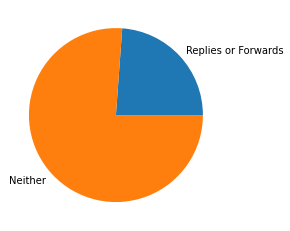

In [20]:
plt.pie(y, labels=["Replies or Forwards", "Neither"])
plt.show()

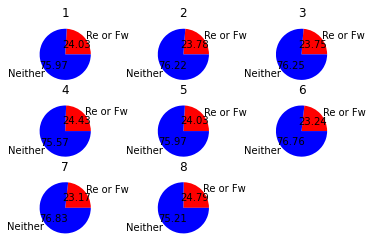

In [21]:
for i in range(1,9):
    plt.subplot(3,3,i)
    plt.pie(locals()['y_{}'.format(i)], labels=["Re or Fw", "Neither"], autopct = '%.2f', colors = ['red', 'blue']) 
    plt.title('{}'.format(i))
    
plt.show()    

In [22]:
l1 = stopwords.words('english')
lst1 = [' {} '.format(x) for x in l1]
lst1.append('Subject:')
lst1.append('Subject :')
lst1.remove(' re ')
# lst2 = [ '.{} '.format(x) for x in l1]
# lst3 = [ ' {}.'.format(x) for x in l1]

In [23]:
# Remove too common words from the list we procurred:
for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace(lst1, " ", regex=True, inplace=True)
    
   #  locals()['df_{}'.format(i)]['E-mails'].replace(lst2, " ", regex=True, inplace=True)
   #  locals()['df_{}'.format(i)]['E-mails'].replace(lst3, " ", regex=True, inplace=True)
df_train['E-mails'].replace(lst1, " ", regex=True, inplace=True)
df_test['E-mails'].replace(lst1, " ", regex=True, inplace=True)

In [24]:
# Remove punctuation and often used symbols, but NOT ':' since we'll need later
# "[?!.,;()"\/|&-`#$%^]"
for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
    
df_train['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
df_test['E-mails'].replace(r'[^\w\s]', " ", regex=True, inplace=True)

In [25]:
# Remove all numbers from the e-mails, as they're (mostly) redundant
# "[0-9999999999]"

for i in range(0,9):
    locals()['df_{}'.format(i)]['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)

df_train['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)
df_test['E-mails'].replace('[0-9999999999]', " ", regex=True, inplace=True)

In [26]:
df_train

,E-mails,spam
21257,returned mail see transcript details\nthe ...,1.0
18147,ilug social need internet exposure lea...,1.0
26636,kingdom god\nfrom mrs goodness h alfre...,1.0
6636,rooming list enron offsite\ncandice \nliste...,0.0
11396,california update \nbelow transcr...,0.0
...,...,...
10100,ya \nhey ya long time see,1.0
15076,p ri ce r ight\nlook crazy prices high...,1.0
24620,home little per month\nbait excelled ...,1.0
23280,lose weight new weightloss loses \nh...,1.0


In [27]:
df_test

,E-mails,spam
24680,hassles embarrasment order us q\nmoulages ep...,1.0
7577,alliance ferc alert regional market report...,0.0
14578,fw netco canada\ntammie attached organiz...,0.0
9257,credit business plan\nhi jeff \nmy research...,0.0
19308,shocked\nhello welcome meteor medzonline s...,1.0
...,...,...
8596,doreen\nv \ni spoke doreen morning re san...,0.0
21779,contacts\nhere contacts realized typed\nth...,0.0
19106,launched website one visits \nsubmitting we...,1.0
4478,approval \nhello \nwe sent email ago ...,1.0


In [28]:
df_4

,E-mails,spam
2255,enron hpl actuals december \nteco...,0.0
25668,utf q wishlist rolex wat \n...,1.0
13806,bookcases\ni talked kim kaase said cost book...,0.0
17494,ou corporate view\ndear ou team members \na...,0.0
4853,go married babe\nare bored loney \nor sic...,1.0
...,...,...
20363,clear benefits creative design\nlt really ha...,1.0
7508,spring energy finance conference partic...,0.0
27555,special promotion get starbucks gift...,1.0
23085,texas power markets report available\ntexa...,0.0


In [29]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [30]:
# nltk.download('wordnet')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [31]:
for i in range(0,9):
    locals()['df_{}_lem'.format(i)] = locals()['df_{}'.format(i)]['E-mails'].apply(lemmatize_text)

df_train_lem = df_train['E-mails'].apply(lemmatize_text)
df_test_lem = df_test['E-mails'].apply(lemmatize_text)

In [148]:
## All words used in df_1
for i in range(0,9):
    locals()['d{}'.format(i)] = locals()['df_{}'.format(i)].stack().str.split("[^\w+]").explode().tolist()

dftrain = df_train['E-mails']
dftrain = pd.DataFrame(dftrain, columns=['E-mails'])
dftrain = df_train.stack().str.split("[^\w+]").explode().tolist()
## Ignore the warnings please

<>:3: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \w
<ipython-input-148-e123212a5704>:3: DeprecationWarning: invalid escape sequence \w
  locals()['d{}'.format(i)] = locals()['df_{}'.format(i)].stack().str.split("[^\w+]").explode().tolist()
<ipython-input-148-e123212a5704>:7: DeprecationWarning: invalid escape sequence \w
  dftrain = df_train.stack().str.split("[^\w+]").explode().tolist()


In [ ]:
## Remove the identings
for i in range(0,9):
    locals()['d{}'.format(i)]= list(filter(None, locals()['d{}'.format(i)])) # our 'bag of words'
    ## Remove fewer than 4 characters terms
    locals()['d{}'.format(i)] = [token for token in locals()['d{}'.format(i)] if len(token)>4]
    ## Read unique terms => dictionary
    locals()['d{}_u'.format(i)] = np.unique(locals()['d{}'.format(i)]) # our dictionary, finally!

dftrain = list(filter(None, dftrain))
dftrain = [n for n in dftrain if len(n)>4]
dftrain_u = np.unique(dftrain)

In [255]:
d5_u

array(['aabvmmq', 'aaghpdvvu', 'aagrra', ..., 'þettit', 'þeyin',
       'þöyledir'], dtype='<U24')

In [264]:
len(dftrain_u)

100589

In [34]:
def countX(lst, x): 
    return lst.count(x)

In [266]:
## WARNING: Immense runtime expected, ~ 1 hour 
v = np.zeros(len(dftrain))
i = 0
for x in dftrain_u:
    v[i] = countX(dftrain,x)
    i = i + 1

In [268]:
v ## Number of occurences of every element
len(v)

2620892

In [270]:
v1 = v/len(dftrain) 
	## This stores the term frequencies of all terms in dftrain
	## They're stored in indices corresponding to the indices of df1_u, i.e. v1[i] is the term frequency of term on the ith position in df1_u
sum(v1) # should be very, VERY close to 1

1.000000000000923

In [67]:
for i in range(0,9):
    locals()['df_{}_lem_list'.format(i)] = locals()['df_{}_lem'.format(i)].values.tolist()

df_train_lem_list = df_train_lem.values.tolist()
df_test_lem_list = df_test_lem.values.tolist()
df_3_lem_list[0:2]

[['leadlng',
  'software',
  'leadlng',
  'software',
  'bundle',
  'window',
  'x',
  'p',
  'pro',
  'office',
  'x',
  'p',
  'pro',
  'low',
  'see',
  'complete',
  'l',
  'st',
  'bundie',
  'macromedia',
  'dreamwaver',
  'mx',
  'fiash',
  'mx',
  'oo',
  'doliars',
  'bundle',
  'adobe',
  'photoshop',
  'premiere',
  'llustrator',
  'lo',
  'doliars',
  'the',
  'offer',
  'valid',
  'untill',
  'february',
  'th',
  'stock',
  'llm',
  'ted',
  'your',
  'password',
  'expired',
  'esperanza',
  'holden',
  'meteorologis',
  'poetzsch',
  'consulting',
  'biotechnology',
  'berlin',
  'germany',
  'germany',
  'phone',
  'mobile',
  'email',
  'vbdmjgilfcvx',
  'burek',
  'net',
  'this',
  'message',
  'beng',
  'sent',
  'confirm',
  'account',
  'please',
  'reply',
  'directly',
  'message',
  'this',
  'version',
  'second',
  'usage',
  'file',
  'note',
  'the',
  'content',
  'note',
  'usage',
  'dupont',
  'emeritus',
  'wherewith',
  'influent',
  'eyewitness',
  

In [68]:
lister = [[] for x in range(len(df_train_lem))]
for i in range(len(df_train_lem_list)):
    l = df_train_lem_list[i]
    for token in l:
        if len(token)>4:
            lister[i].append(token)

lister[0:2]

[['returned',
  'transcript',
  'detail',
  'original',
  'message',
  'received',
  'nfrance',
  'following',
  'address',
  'permanent',
  'fatal',
  'error',
  'reason',
  'quota',
  'exceeded',
  'transcript',
  'session',
  'follows',
  'talking',
  'unknown',
  'first'],
 ['social',
  'internet',
  'exposure',
  'marketing',
  'million',
  'offer',
  'price',
  'internet',
  'mailing',
  'provide',
  'simple',
  'price',
  'start',
  'million',
  'target',
  'start',
  'million',
  'mllion',
  'ordering',
  'within',
  'sending',
  'thats',
  'mailing',
  'learnmorezzl',
  'yahoo',
  'deletion',
  'irish',
  'linux',
  'group',
  'social',
  'event',
  'social',
  'linux',
  'linux',
  'mailman',
  'listinfo',
  'social',
  'subscription',
  'information',
  'maintainer',
  'listmaster',
  'linux']]

In [69]:
dictionary = gensim.corpora.Dictionary(lister)

In [70]:
bow_corpus = [dictionary.doc2bow(doc) for doc in lister]

In [71]:
tfidf=gensim.models.TfidfModel(bow_corpus)
tfidf_corp = tfidf[bow_corpus]

In [72]:
bow_corpus[0:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1)],
 [(20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 4),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 4),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)]]

In [73]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corp, num_topics=6, id2word=dictionary, passes=2, workers=4)

In [74]:
# !python -m pip install pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [75]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')

In [76]:
from gensim.models.coherencemodel import CoherenceModel
def getCoherence(m,t,d):
    coherence_model_lda = CoherenceModel(model=m,texts=t, dictionary=d, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return(coherence_lda) # Need high coherence

In [110]:
perplex = lda_model_tfidf.log_perplexity(tfidf_corp) # Need low perplexity

In [111]:
perplex

-11.062995419487898

In [79]:
getCoherence(m=lda_model_tfidf, t=lister, d =dictionary)

0.4019360303157657

In [86]:
### Starting with this, these 3 lines together take a really long time to run ~ aprox 80min for me
gCH = [0] * 50
for i in range(1,50):
    locals()['lda_model_tfidf_{}'.format(i)] = gensim.models.LdaMulticore(tfidf_corp, num_topics=i, id2word=dictionary, passes=2, workers=6)

In [88]:
for i in range(1,50):
    gCH[i]=getCoherence(m=locals()['lda_model_tfidf_{}'.format(i)], t=lister, d =dictionary)

In [112]:
perplexity = [0] * 50
for i in range(1,50):
    perplexity[i]=locals()['lda_model_tfidf_{}'.format(i)].log_perplexity(tfidf_corp)

In [113]:
perplexity # Seems to be decreasing steadily the more topics we try
        ## We hence decide to give much more importance to the coherence aspect

[0,
 -10.106993255669646,
 -10.326539232274184,
 -10.57752237575587,
 -10.759484848882382,
 -10.915090618354022,
 -11.082840307696692,
 -11.330144596702178,
 -11.513812462703125,
 -11.58094001064871,
 -11.972189475253556,
 -12.121446000052089,
 -12.365673599549178,
 -12.523743121347694,
 -12.76997872528995,
 -12.931979405655301,
 -13.061687493638543,
 -13.347962288101268,
 -13.537529617565148,
 -13.729744030371164,
 -13.902319856941386,
 -13.989573341899847,
 -14.304691661752397,
 -14.510534614106001,
 -14.690884756139845,
 -15.006276723467384,
 -15.195509317818695,
 -15.431687859669433,
 -15.639691722677336,
 -15.926898353184669,
 -16.071123762474635,
 -16.315021657699088,
 -16.548030697449853,
 -16.846973230554614,
 -17.082600714507283,
 -17.315293194808774,
 -17.600527933172135,
 -17.53996597821684,
 -18.221053172450322,
 -18.543107931306263,
 -18.805311716930944,
 -18.708036840901492,
 -19.458051604999874,
 -19.803872216148346,
 -20.106049217837285,
 -20.357728481567165,
 -20.83216

In [89]:
gCH

[0,
 0.3232850030343203,
 0.33447588999293576,
 0.3314526226959314,
 0.3677553566818425,
 0.30648095428721867,
 0.3776400692625219,
 0.3978245965142459,
 0.3613020599525842,
 0.30710559033636803,
 0.3607439692932172,
 0.38296106765979976,
 0.36964317455483475,
 0.3074184152567412,
 0.40958758827330144,
 0.3826536337503171,
 0.38080583918736793,
 0.3823297752498229,
 0.37766756003495394,
 0.3588641756681911,
 0.36284489624702154,
 0.38646906112212615,
 0.403205097560618,
 0.43375666422768333,
 0.3967383085634138,
 0.4096065811466812,
 0.37583165452585915,
 0.4211542804354719,
 0.395697884764089,
 0.3951516905724977,
 0.3731671093986219,
 0.3927798457409771,
 0.41512889977691103,
 0.41234468054491463,
 0.42091097284192136,
 0.42809053477243475,
 0.3989933183630821,
 0.4056667955992759,
 0.4346013881493841,
 0.4151319096287939,
 0.44262535393639835,
 0.4595733806625124,
 0.4454277407839268,
 0.4371042567716222,
 0.46716728872058383,
 0.44919364858516103,
 0.42559528191803864,
 0.454919495

In [90]:
len(gCH)

50

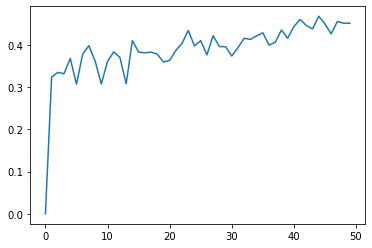

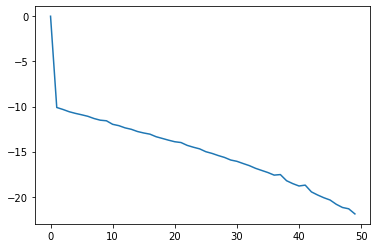

In [126]:
plt.plot(gCH)
plt.show()
plt.plot(perplexity)
plt.show()

In [92]:
print("The maximum number is", max(gCH), "and its corresponding number of topics is", np.argmax(gCH))

The maximum number is 0.46716728872058383 and its corresponding number of topics is 44


In [95]:
lda_display_good = pyLDAvis.gensim.prepare(lda_model_tfidf_44, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display_good, template_type='notebook')

In [96]:
lda_display_me = pyLDAvis.gensim.prepare(lda_model_tfidf_2, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display_me, template_type='notebook')

## We know this has corresponding coherence: gCH[2]= 0.33447588999293576 and corresponding perplexity perplexity[2] = 

In [130]:
y_pred = [] # model predictions
y_actual = list(df_train['spam']) # list of original classification of spam/normal for the data set

for i in range(0,len(df_train)): # for each document
    for index, score in sorted(lda_model_tfidf_2[tfidf_corp[i]], key=lambda tup: -1*tup[1]): # pull the topic (index) and score (probability) from the model 
        if score >= 0.5 and index == 1: # if the index is 0 and score (read probability) is >0.5 
                                        # assign 0
            y_pred.append(0)
            break
        elif score > 0.5 and index == 0: # same as above for 1
            y_pred.append(1)
            break


In [131]:
from sklearn.metrics import confusion_matrix, classification_report

def classification_eval(y_true,y_pred):
    
    print("Confusion Matrix")
    C = confusion_matrix(y_true,y_pred)
    
    print('Classification report')
    print(classification_report(y_true, y_pred, target_names = ['Normal', 'Spam'], digits=3))

In [132]:
classification_eval(y_actual,y_pred)

Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      0.686     0.899     0.778     13544
        Spam      0.809     0.511     0.626     11395

    accuracy                          0.721     24939
   macro avg      0.747     0.705     0.702     24939
weighted avg      0.742     0.721     0.708     24939



In [138]:
lister2 = [[] for x in range(len(df_test_lem))]
for i in range(len(df_test_lem_list)):
    l2 = df_test_lem_list[i]
    for token in l2:
        if len(token)>4:
            lister2[i].append(token)

lister2[0:2]

[['hassle',
  'embarrasment',
  'order',
  'moulages',
  'epipial',
  'cotoneaster',
  'roughtailed',
  'timetrp',
  'stalklet',
  'overshooting',
  'nonputrescent',
  'spelled',
  'weighted',
  'clearish',
  'pneumotomy',
  'predominate',
  'dehumidification',
  'precooks',
  'withstay',
  'split',
  'franchisers',
  'overshooting',
  'puller',
  'aerosolized',
  'unstemmable',
  'sodioplatinic',
  'jovilabe',
  'plasmatic',
  'claustrophobe',
  'keyways',
  'oxalis',
  'gastromenia',
  'spallation',
  'grandchild',
  'enfettered',
  'despotat',
  'heirskip',
  'bebouldered',
  'stiffing',
  'epinephrine',
  'nonsuggestion',
  'unblanched',
  'unconsonant',
  'hissproof',
  'playgoer',
  'sermocination',
  'sappiest',
  'fourcher',
  'dewlap',
  'rhyming',
  'playingly',
  'assaulted',
  'pinchecks',
  'brimfully',
  'percolate',
  'epipial',
  'felon',
  'decannulation',
  'palatine',
  'bougar',
  'mysticly',
  'ursine',
  'pisciculturally',
  'atavism',
  'neostriatum',
  'decasper

In [139]:
dictionary_test = gensim.corpora.Dictionary(lister2)
bow_corpus_test = [dictionary_test.doc2bow(doc) for doc in lister2]

In [140]:
tfidf2=gensim.models.TfidfModel(bow_corpus_test)
tfidf2_corp = tfidf2[bow_corpus_test]

In [141]:
lda_model_tfidf_test = gensim.models.LdaMulticore(tfidf2_corp, num_topics=2, id2word=dictionary_test, passes=2, workers=4)

In [142]:
lda_display_test = pyLDAvis.gensim.prepare(lda_model_tfidf_test, tfidf2_corp, 
                                          dictionary_test, mds='mmds')
pyLDAvis.display(lda_display_test, template_type='notebook')

In [145]:
y_pred2 = [] # model predictions
y_actual2 = list(df_test['spam']) # list of original classification of spam/normal for the data set

for i in range(0,len(df_test)): # for each document
    for index, score in sorted(lda_model_tfidf_test[tfidf2_corp[i]], key=lambda tup: -1*tup[1]): # pull the topic (index) and score (probability) from the model 
        if score >= 0.5 and index == 0: # if the index is 1 and score (read probability) is >0.5 
                                        # assign 0
            y_pred2.append(0)
            break
        elif score > 0.5 and index == 1: # same as above for 0
            y_pred2.append(1)
            break

In [147]:
classification_eval(y_actual2,y_pred2)
        ## Will likely turn out the sample size for testing is too small for a binary division (i.e. only 2 topic models)

Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      0.601     0.723     0.656      1502
        Spam      0.571     0.435     0.494      1275

    accuracy                          0.591      2777
   macro avg      0.586     0.579     0.575      2777
weighted avg      0.587     0.591     0.582      2777

